# DECISION TREE

- Tree shaped diagram used to determine a course of action. Each branch of the tree represents a possible decision, occurrence or reaction

PROBLEMS THAT DECISION TREE CAN SOLVE:
- classification - discreete var
- regression - numerical var

ADVANTAGES:
- simple to undrestand
- little effort required
- handle numerical and categorical data
- non linear paramaters don't effect it's performance
 
DISADVANTAGES:
- overfitting - algorithm captures noise in the data
- high variance - can get unstable due to small variation in data
- Low biased Tree - complicated decision tree tends to have a low blas which makes it difficult for the model to work with new data
 

IMPORTANT TERMS:
- ENTROPY - measure randomness or unpredictability in the dataset
- INFORMATION GAIN - mesaure of decrease in entropy after the dataset split
- LEAF NODE - carries the classification or the decision
- ROOT NODE - decision node

Loan Repayment prediciton

In [35]:
import pandas as pd
import numpy as np
from IPython.display import Image
balance_data=pd.read_csv('Data/Decision_Tree_ Dataset.csv')

In [36]:
balance_data.head()

,1,2,3,4,sum,Unnamed: 5
0,201,10018,250,3046,13515,yes
1,205,10016,395,3044,13660,yes
2,257,10129,109,3251,13746,yes
3,246,10064,324,3137,13771,yes
4,117,10115,496,3094,13822,yes


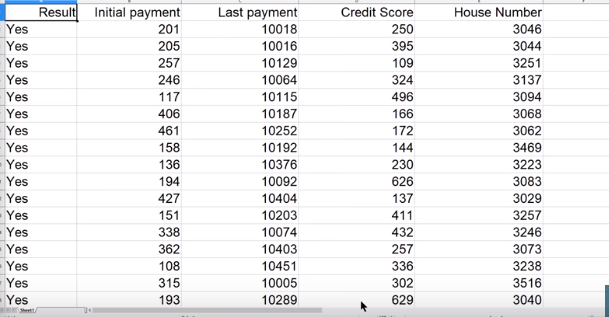

In [37]:
Image(filename='Pictures/M66.PNG',width=600,height=600)

In [38]:
print("dataset Lenght:: ", len(balance_data))

dataset Lenght::  1000


In [39]:
print("Dataset Shape:: ", balance_data.shape)

Dataset Shape::  (1000, 6)


In [40]:
balance_data.columns= ['Initial payment','Last Payment','Credit Score','House Number','Sum','Result']

In [41]:
balance_data.head()

,Initial payment,Last Payment,Credit Score,House Number,Sum,Result
0,201,10018,250,3046,13515,yes
1,205,10016,395,3044,13660,yes
2,257,10129,109,3251,13746,yes
3,246,10064,324,3137,13771,yes
4,117,10115,496,3094,13822,yes


In [42]:
#Result column moving to the first place

In [43]:
columns=balance_data.columns.tolist()

In [44]:
columns

['Initial payment',
 'Last Payment',
 'Credit Score',
 'House Number',
 'Sum',
 'Result']

In [45]:
columns=columns[-1:] + columns[:-1]

In [46]:
columns

['Result',
 'Initial payment',
 'Last Payment',
 'Credit Score',
 'House Number',
 'Sum']

In [47]:
balance_data = balance_data[columns]

In [48]:
balance_data.head()

,Result,Initial payment,Last Payment,Credit Score,House Number,Sum
0,yes,201,10018,250,3046,13515
1,yes,205,10016,395,3044,13660
2,yes,257,10129,109,3251,13746
3,yes,246,10064,324,3137,13771
4,yes,117,10115,496,3094,13822


In [49]:
balance_data = balance_data.drop('Sum', axis=1)

In [50]:
balance_data.head()

,Result,Initial payment,Last Payment,Credit Score,House Number
0,yes,201,10018,250,3046
1,yes,205,10016,395,3044
2,yes,257,10129,109,3251
3,yes,246,10064,324,3137
4,yes,117,10115,496,3094


Separating data:
- x----> Initial pay.,Last p.,Credit s.,House N.
- y----> Result

In [53]:
x = balance_data.iloc[:, 1:5].values
x

array([[  201, 10018,   250,  3046],
       [  205, 10016,   395,  3044],
       [  257, 10129,   109,  3251],
       ...,
       [  316, 14872,   613,  4760],
       [  305, 14926,   897,  4572],
       [  168, 14798,   834,  4937]], dtype=int64)

In [54]:
y=balance_data.iloc[:, 0].values

In [55]:
y

array(['yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes',

In [56]:
#Spliting data

In [57]:
from sklearn.model_selection import train_test_split

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

In [60]:
#Function to perform training with entropy

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [69]:
clf_entropy=DecisionTreeClassifier(criterion="entropy", max_depth=3,random_state=100,min_samples_leaf=5)

In [70]:
clf_entropy.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [71]:
#make a prediciton

In [72]:
y_pred=clf_entropy.predict(x_test) #new loans to test
y_pred

array(['yes', 'yes', 'No', 'yes', 'No', 'yes', 'yes', 'yes', 'No', 'No',
       'No', 'No', 'yes', 'No', 'No', 'yes', 'yes', 'No', 'yes', 'No',
       'No', 'yes', 'No', 'yes', 'yes', 'No', 'No', 'yes', 'No', 'No',
       'No', 'yes', 'yes', 'yes', 'yes', 'No', 'No', 'No', 'yes', 'No',
       'yes', 'yes', 'yes', 'No', 'No', 'yes', 'yes', 'yes', 'No', 'No',
       'yes', 'No', 'yes', 'yes', 'yes', 'yes', 'No', 'yes', 'No', 'yes',
       'yes', 'No', 'yes', 'yes', 'No', 'yes', 'yes', 'yes', 'No', 'No',
       'No', 'No', 'No', 'yes', 'No', 'yes', 'yes', 'No', 'yes', 'No',
       'No', 'No', 'No', 'yes', 'No', 'yes', 'No', 'yes', 'yes', 'No',
       'yes', 'yes', 'yes', 'yes', 'yes', 'No', 'yes', 'yes', 'yes',
       'yes', 'No', 'No', 'yes', 'yes', 'No', 'yes', 'yes', 'yes', 'No',
       'yes', 'yes', 'yes', 'yes', 'No', 'No', 'yes', 'yes', 'yes', 'No',
       'No', 'No', 'No', 'yes', 'yes', 'No', 'yes', 'yes', 'yes', 'No',
       'No', 'yes', 'yes', 'No', 'yes', 'yes', 'yes', 'No', 'ye

In [73]:
#how good model is?

In [74]:
from sklearn.metrics import accuracy_score

In [75]:
acc=accuracy_score(y_test,y_pred)*100

In [76]:
acc

93.66666666666667

In [77]:
#matrix?

In [79]:
from sklearn.metrics import confusion_matrix

In [80]:
cm=confusion_matrix(y_test,y_pred)

In [81]:
cm

array([[134,  13],
       [  6, 147]], dtype=int64)

In [82]:
acc=(134+147)/(134+13+6+147)
acc

0.9366666666666666

In [83]:
#pretty good model!!!